# Проект: Выбор локации для бурения скважины

Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats as st

In [1]:
#region1 = pd.read_csv('###')
#region2 = pd.read_csv('###')
#region3 = pd.read_csv('###')

<b>Посмотрим данные на наличие пропусков и неверного формата</b>

In [3]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<b>Взглянем на мультиколлинеарность данных в каждом регионе</b>

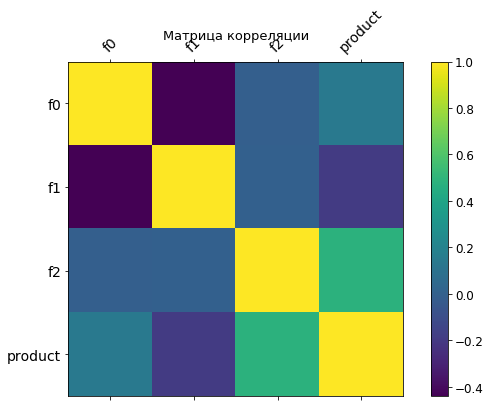

In [6]:
f = plt.figure(figsize=(10, 6))
plt.matshow(region1.corr(), fignum=f.number)
plt.xticks(range(region1.select_dtypes(['number']).shape[1]), region1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(region1.select_dtypes(['number']).shape[1]), region1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Матрица корреляции', fontsize=13)
plt.show()

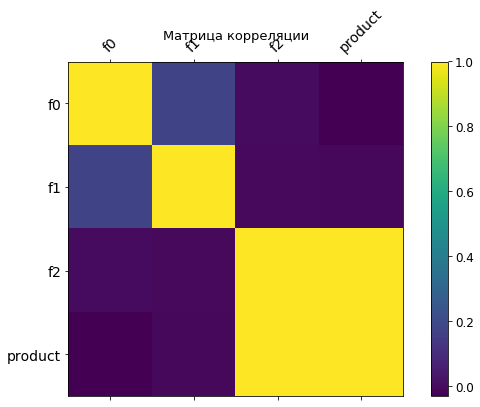

In [7]:
f = plt.figure(figsize=(10, 6))
plt.matshow(region2.corr(), fignum=f.number)
plt.xticks(range(region2.select_dtypes(['number']).shape[1]), region2.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(region2.select_dtypes(['number']).shape[1]), region2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Матрица корреляции', fontsize=13)
plt.show()

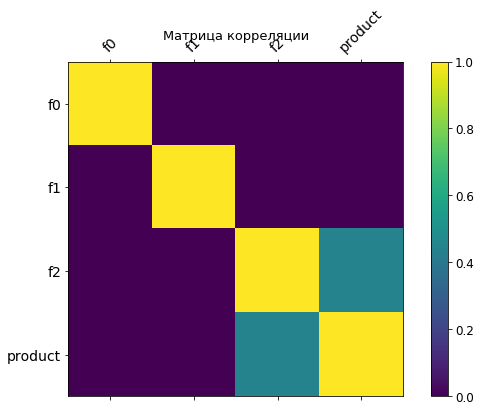

In [8]:
f = plt.figure(figsize=(10, 6))
plt.matshow(region3.corr(), fignum=f.number)
plt.xticks(range(region3.select_dtypes(['number']).shape[1]), region3.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(region3.select_dtypes(['number']).shape[1]), region3.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Матрица корреляции', fontsize=13)
plt.show()

<b>Во втором регионе мы видим сильную взаимосвязь признака f2 и целевого. В первом регионе их связь чуть слабее, но сильнее, чем в третьем</b>

<b>Подготовим данные</b>

In [9]:
features1 = region1.drop(columns=['id', 'product'], axis=1)
target1 = region1['product']

In [10]:
features2 = region2.drop(columns=['id', 'product'], axis=1)
target2 = region2['product']

In [11]:
features3 = region3.drop(columns=['id', 'product'], axis=1)
target3 = region3['product']

## Обучение и проверка модели

<b>2.1. Разобьём данные на обучающую и валидационную выборки в соотношении 75:25</b>

In [12]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(
     features1, target1, test_size=0.25, random_state=11)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(
     features2, target2, test_size=0.25, random_state=22)
X3_train, X3_valid, y3_train, y3_valid = train_test_split(
     features3, target3, test_size=0.25, random_state=33)

In [13]:
print(X1_valid.shape, y1_valid.shape)

(25000, 3) (25000,)


<b>2.2. Обучим модель и сделаем предсказания на валидационной выборке</b>

In [14]:
np.random.seed(111)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_valid)

In [15]:
np.random.seed(222)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_valid)

In [16]:
np.random.seed(333)
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y3_pred = model3.predict(X3_valid)

<b>2.3. Сохраним предсказания и правильные ответы на валидационной выборке.</b>

In [17]:
print('Коэффициенты уравнения регрессии: \n', model1.coef_)
print('Средняя квадратичная ошибка: %.2f'
      % mean_squared_error(y1_valid, y1_pred))
print('Коэффициент детерминации(R2): %.2f'
      % r2_score(y1_valid, y1_pred))
print('Средняя абсолютная ошибка: %.2f'
      % mean_absolute_error(y1_valid, y1_pred))

Коэффициенты уравнения регрессии: 
 [  3.74094748 -14.30448912   6.63730365]
Средняя квадратичная ошибка: 1430.33
Коэффициент детерминации(R2): 0.27
Средняя абсолютная ошибка: 31.08


In [18]:
print('Коэффициенты уравнения регрессии: \n', model2.coef_)
print('Средняя квадратичная ошибка: %.2f'
      % mean_squared_error(y2_valid, y2_pred))
print('Коэффициент детерминации(R2): %.2f'
      % r2_score(y2_valid, y2_pred))
print('Средняя абсолютная ошибка: %.2f'
      % mean_absolute_error(y2_valid, y2_pred))

Коэффициенты уравнения регрессии: 
 [-1.44933669e-01 -2.17348953e-02  2.69509586e+01]
Средняя квадратичная ошибка: 0.80
Коэффициент детерминации(R2): 1.00
Средняя абсолютная ошибка: 0.72


In [19]:
print('Коэффициенты уравнения регрессии: \n', model3.coef_)
print('Средняя квадратичная ошибка: %.2f'
    % mean_squared_error(y3_valid, y3_pred))
print('Коэффициент детерминации(R2): %.2f'
    % r2_score(y3_valid, y3_pred))
print('Средняя абсолютная ошибка: %.2f'
    % mean_absolute_error(y3_valid, y3_pred))

Коэффициенты уравнения регрессии: 
 [-0.01230264 -0.06917852  5.76249223]
Средняя квадратичная ошибка: 1614.98
Коэффициент детерминации(R2): 0.19
Средняя абсолютная ошибка: 32.88


<b>2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.</b>

In [20]:
print('Cредний запас предсказанного сырья 1й модели {:.2f}'.format(y1_pred.mean()))
print('Средняя квадратичная ошибка 1й модели(оригинальная размерность): %.2f' 
    % (mean_squared_error(y1_valid, y1_pred) ** 0.5))

Cредний запас предсказанного сырья 1й модели 92.40
Средняя квадратичная ошибка 1й модели(оригинальная размерность): 37.82


In [21]:
print('Cредний запас предсказанного сырья 2й модели {:.2f}'.format(y2_pred.mean()))
print('Средняя квадратичная ошибка 2й модели(оригинальная размерность): %.2f' 
    % (mean_squared_error(y2_valid, y2_pred) ** 0.5))

Cредний запас предсказанного сырья 2й модели 68.72
Средняя квадратичная ошибка 2й модели(оригинальная размерность): 0.89


In [22]:
print('Cредний запас предсказанного сырья 3й модели {:.2f}'.format(y3_pred.mean()))
print('Средняя квадратичная ошибка 3й модели(оригинальная размерность): %.2f' 
    % (mean_squared_error(y3_valid, y3_pred) ** 0.5))

Cредний запас предсказанного сырья 3й модели 95.11
Средняя квадратичная ошибка 3й модели(оригинальная размерность): 40.19


<b>2.5. Проанализируем результаты.</b>

<b>Выводы:</b>
* Модель обученная на данных первого региона ошибается на <b>37.8 тысяч баррель</b>, а в сравнении со средней MSE моделью показывает <b>0.27 из 1</b>
* Модель обученная на данных второго региона ошибается на <b>0.89 тысяч баррель</b>, а в сравнении со средней MSE моделью показывает <b>1 из 1</b> (проведённая ранее проверка на мультиколлинеарность выявила сильную зависимость f1 признака от целевого), что намекает на идеальность модели
* Модель обученная на данных третьего региона ошибается на <b>40.19 тысяч баррель</b>, а в сравнении со средней MSE моделью показывает <b>0.19 из 1</b>

## Подготовка к расчёту прибыли

<b>3.1. Все ключевые значения для расчётов сохраним в отдельных переменных.</b>

In [23]:
region_budget = 10000000000
income_barrel = 450000

<b>3.2. Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.</b>

In [24]:
j = 1
print('Достаточный объём сырья для безубыточной разработки новой скважины:', round(region_budget / income_barrel / 200))
for i in (region1, region2, region3):
    print('Средний запас сырья в {}-м регионе: {}'.format(j, i['product'].mean()))
    j+=1

Достаточный объём сырья для безубыточной разработки новой скважины: 111
Средний запас сырья в 1-м регионе: 92.50000000000001
Средний запас сырья в 2-м регионе: 68.82500000000002
Средний запас сырья в 3-м регионе: 95.00000000000004


<b>3.3. Выводы по этапу подготовки расчёта прибыли.</b>

<b>Выводы:</b>
* Выделен бюджет в 10 млрд рублей/200 скважин
* В среднем запасы сырья по регионам от 68-95 тысяч баррель, а необходимый объём для безубыточной разработки - 111 тысяч баррель на одну скважину

## Расчёт прибыли и рисков 

<b>4.1. Выберем скважины с максимальными значениями предсказаний.</b>

In [25]:
def top_boreholes(target, pred, count):
    probs_sorted = pd.Series(pred).sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return selected

In [26]:
top1 = top_boreholes(y1_valid, y1_pred, 200)
top2 = top_boreholes(y2_valid, y2_pred, 200)
top3 = top_boreholes(y3_valid, y3_pred, 200)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


<b>4.2. Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.</b>

In [27]:
j = 1
for i in (top1, top2, top3):
    print('Суммарный объём сырья, предсказанный для {} региона: {}'.format(j, round(i.sum())))
    j += 1

Суммарный объём сырья, предсказанный для 1 региона: 4033
Суммарный объём сырья, предсказанный для 2 региона: 3159
Суммарный объём сырья, предсказанный для 3 региона: 4885


<b>4.3. Рассчитаем прибыль для полученного объёма сырья.</b>

In [28]:
j = 1
for i in (top1, top2, top3):
    print('Прибыль для полученного объёма сырья в {} регионе: {}'.format(j, round(i.sum()) * income_barrel))
    j += 1

Прибыль для полученного объёма сырья в 1 регионе: 1814850000
Прибыль для полученного объёма сырья в 2 регионе: 1421550000
Прибыль для полученного объёма сырья в 3 регионе: 2198250000


<b>Итог</b>
* В первом регионе, с полученного обьёма сырья мы получим: 1.8 млрд прибыли
* Во втором регионе: 1.4 млрд
* В третьем: 2.1 млрд

## Посчитаем риски и прибыль для каждого региона

<b>5.1. Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.</b>

In [29]:
def revenue_boreholes(target, pred, count):
    probs_sorted = pred.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (selected.sum() * income_barrel) - region_budget

In [30]:
revenue_boreholes(y1_valid, pd.Series(y1_pred), 200)

-8185308139.426935

In [31]:
state = np.random.RandomState(666)
def income_distribution(target, pred):
    values = []
    loss_counter = 0
    for i in range(1000):
        subtarget = target.sample(n=500, replace=True, random_state=state)
        subpred = pd.Series(pred, index=target.index)[subtarget.index]
        top_value = revenue_boreholes(subtarget, subpred, 200)
        values.append(top_value)
        if top_value < 0:
            loss_counter += 1
    values = pd.Series(values)
    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)
    mean = values.mean()
    print("Средний доход:", mean)
    print("97.5%-квантиль:", upper)
    print("2.5%-квантиль:", lower)
    print("Убыточность: {:.0%}".format(loss_counter/len(values)))

<b>5.2. Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.</b>

In [32]:
income_distribution(y1_valid, y1_pred)

Средний доход: 405695742.59118146
97.5%-квантиль: 925033286.3432511
2.5%-квантиль: -128833893.39347391
Убыточность: 8%


In [33]:
income_distribution(y2_valid, y2_pred)

Средний доход: 494006659.15525734
97.5%-квантиль: 906723637.8469998
2.5%-квантиль: 87374565.74088345
Убыточность: 1%


In [34]:
income_distribution(y3_valid, y3_pred)

Средний доход: 374338275.6904386
97.5%-квантиль: 897039599.4244776
2.5%-квантиль: -155923184.6288626
Убыточность: 9%


<b>5.3. Выводы: предложим регион для разработки скважин и обоснуем выбор.</b>

Учитывая среднюю доходность в распределении из бутстрапа выиграл <b>второй регион</b>. Изначально у модели были получены хорошие показатели RMSE и R2, а это означает хорошую точность математического расчёта объёма нефти в скважине, ввиду малой погрешности MAE 0.7(700 баррелей против 20000-30000 в других моделях)